# Convolution Neural Network (Сверточная Нейросеть) на Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

Using TensorFlow backend.


### Импортируем необходимые данные:

Загрузим наш датасет "CIFAR10", сразу разбив его на тренировочные и тестовые данные:

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Посмотрим размерность одного из наших объектов:

In [3]:
X_train.shape

(50000, 32, 32, 3)

**"X_train"содержит 50000 экземпляров данных, каждый из которых имеет размерность 32 на 32 пикселя, 3 означает цветную картинку RGB(Red, Green, Blue). На самом деле, здесь содержатся 3 матрицы, отвечающие за красный, зеленый и синий цвет с размерностями, о которых я написал выше.**

Посмотрим на изображение, которое содержится в нашем датасете:

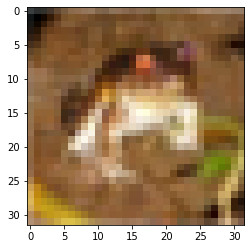

In [4]:
plt.imshow(X_train[0])

При выводе "y_train" должно вернуться значение "6", которое означает класс "лягушки" в датасете "CIFAR10":

In [5]:
y_train[0]

array([6], dtype=uint8)

Таким образом наша модель будет показывать, что она правильно определяет изображения, которые мы ей даем

### Предобработаем наши данные:

Так как данные, которые встроены в датасете, являются сырыми и не совсем пригодными для работы, нам нужно их предобработать. Давайте посмотрим, как наши данные выглядят сейчас:

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Данные имеют тип "uint8", что означает беззнаковое цисло (без запятой в конце, проще говоря)

Также данными являются числа от 0 до 255:

In [7]:
X_train[0].min()

0

In [8]:
X_train[0].max()

255

Нейросети удобнее работать с дробными вещественными числами в диапазоне от 0 до 1. ЧТобы превратить наши данные в такой набор чисел, нужно разделить весь датасет на 255, перед этим изменив тип данных с "uint8" на "float32":

In [9]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
## Мы перезаписываем наши данные, чтобы параметры передались к изначальному датасету

In [10]:
X_train /= 255
X_test /= 255

Посмотрим, что получилось:

In [11]:
X_train[0].min()

0.0

In [12]:
X_train[0].max()

1.0

Преобразуем "y_train" в One-hot Encoding:

Сначала посмотрим, как "y_train" выглядит до него:

In [13]:
y_train[0]

array([6], dtype=uint8)

Нам не подходит такой формат данных, поэтому нужно преобразовать его в тот, с которым можно работать:

Импортируем "np_utils", чтобы создать One-hot Encoding 

In [14]:
from keras.utils import np_utils

Преобразуем наши данные:

In [15]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

Посмотрим, что получилось:

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

One-hot Encoding нам нужен для того, чтобы нейросеть выдавала вектор со значениями, которые означают, что вероятность определеного числа равна 0.1, 0.2 или 1, если число совпадает 

### Создадим нашу модель:

Сначала импортируем абстрактную модель "Sequential" из Keras, на которую мы будем навешивать слои, а также полносвязные слои "Dense" и "Flatten", который отвечает за то, что расплющивает результаты после сверточных слоев, таких как Conv2D и MaxPooling2D  : 

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

Создадим пустую модель:

In [18]:
model = Sequential()

In [19]:
X_train.shape

(50000, 32, 32, 3)

Передадим слои в модель:

In [20]:
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu",
                input_shape=(32, 32, 3), padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu")) 
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

Скомпилируем нашу модель:

In [21]:
model.compile(loss="categorical_crossentropy", ## Это функция ошибки, с помощью которой модель оценивает саму себя
             optimizer="adam", ## Это оптимизатор (то, как наша модель будет учиться 
             metrics=["accuracy"]) ## Это то, как модель себя будет оценивать помимо функции ошибки. В нашем случае, это будет точность


Выведем информацию о нашей модели:

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

### Обучим нашу модель:

In [60]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 535s 13ms/step - loss: 0.8789 - accuracy: 0.6917 - val_loss: 0.7538 - val_accuracy: 0.7378
Epoch 2/10
40000/40000 [==============================] - 531s 13ms/step - loss: 0.7549 - accuracy: 0.7354 - val_loss: 0.7272 - val_accuracy: 0.7484
Epoch 3/10
40000/40000 [==============================] - 532s 13ms/step - loss: 0.6999 - accuracy: 0.7559 - val_loss: 0.7375 - val_accuracy: 0.7457
Epoch 4/10
40000/40000 [==============================] - 531s 13ms/step - loss: 0.6441 - accuracy: 0.7723 - val_loss: 0.6937 - val_accuracy: 0.7599
Epoch 5/10
40000/40000 [==============================] - 531s 13ms/step - loss: 0.6077 - accuracy: 0.7838 - val_loss: 0.6866 - val_accuracy: 0.7669
Epoch 6/10
40000/40000 [==============================] - 531s 13ms/step - loss: 0.5716 - accuracy: 0.7976 - val_loss: 0.7069 - val_accuracy: 0.7620
Epoch 7/10
40000/40000 [==============================] 

### Работа с собтвенными изображениями

In [61]:
from PIL import Image

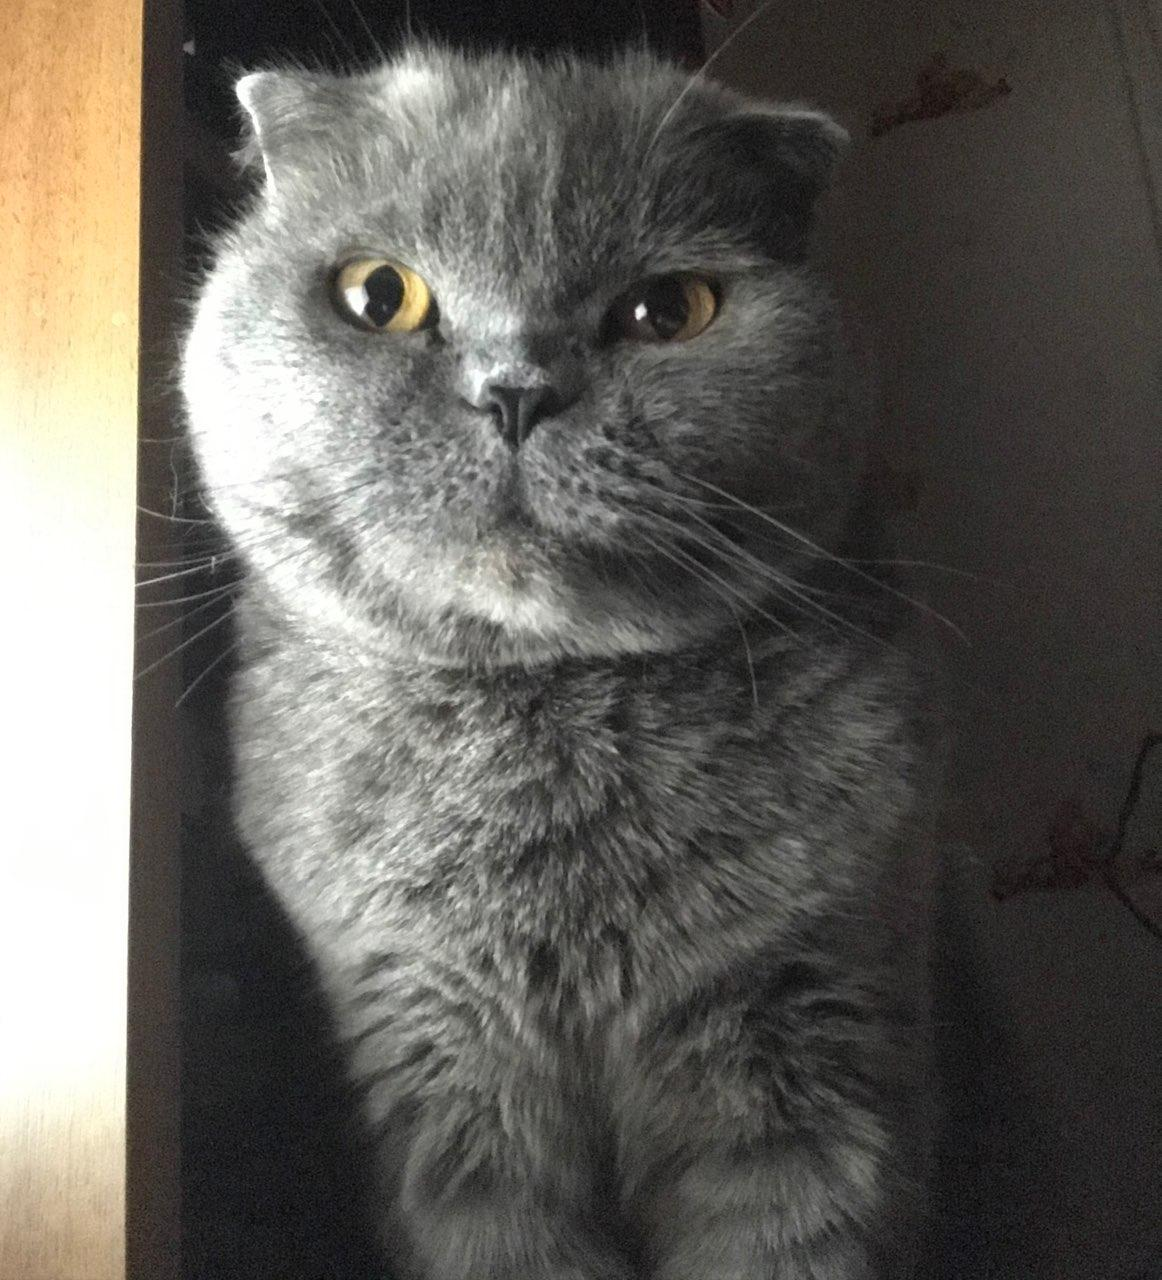

In [62]:
img = Image.open("Cat.jpg")
img

In [63]:
img_array = np.array(img)

In [64]:
img_array

array([[[203, 148,  92],
        [207, 152,  96],
        [207, 152,  96],
        ...,
        [ 67,  62,  56],
        [ 73,  68,  62],
        [ 73,  68,  62]],

       [[199, 144,  88],
        [204, 149,  93],
        [206, 151,  95],
        ...,
        [ 74,  69,  63],
        [ 71,  66,  60],
        [ 71,  66,  60]],

       [[197, 142,  86],
        [202, 147,  91],
        [205, 150,  94],
        ...,
        [ 76,  71,  65],
        [ 76,  71,  65],
        [ 76,  71,  65]],

       ...,

       [[163, 136, 109],
        [162, 135, 108],
        [162, 135, 108],
        ...,
        [ 39,  39,  41],
        [ 47,  47,  49],
        [ 47,  47,  49]],

       [[161, 134, 107],
        [154, 127, 100],
        [154, 127, 100],
        ...,
        [ 45,  45,  47],
        [ 40,  40,  42],
        [ 40,  40,  42]],

       [[161, 134, 107],
        [146, 119,  92],
        [142, 115,  88],
        ...,
        [ 52,  52,  54],
        [ 48,  48,  50],
        [ 48,  48,  50]]

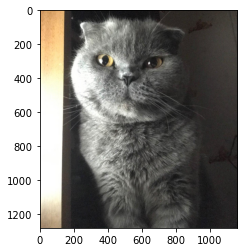

In [65]:
plt.imshow(img_array)

In [66]:
img_array.shape

(1280, 1162, 3)

In [67]:
X = img_array
X = np.resize(img_array, (1, 32, 32, 3))

In [68]:
X.shape

(1, 32, 32, 3)

In [69]:
X_train[0].shape

(32, 32, 3)

In [70]:
V = X_train[0]
V = np.expand_dims(V, axis=0)

In [71]:
V /= 255

In [75]:
V.shape

(1, 32, 32, 3)

In [79]:
model.predict(X)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Оценим нашу модель: